In [1]:
import pandas as pd 
import numpy as np

# Part 1: Data pre-processing

In [2]:
data = pd.read_csv('myocardial_infarction.csv')
data = data.drop(columns=['id'])
data.head()

,age,sex,inf_anam,stenok_an,fk_stenok,ibs_post,ibs_nasl,gb,sim_gipert,dlit_ag,...,jelud_tah,fibr_jelud,a_v_blok,otek_lanc,razriv,dressler,zsn,rec_im,p_im_sten,let_is
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Calculate the number of missing values in each column
nan_counts = data.isnull().sum()

# Sort by missing value counts in descending order
nan_counts_sorted = nan_counts.sort_values(ascending=False)

nan_counts_sorted

kfk_blood     1696
ibs_nasl      1628
s_ad_kbrig    1076
d_ad_kbrig    1076
not_na_kb      686
              ... 
fibr_jelud       0
jelud_tah        0
sex              0
fibr_preds       0
let_is           0
Length: 123, dtype: int64

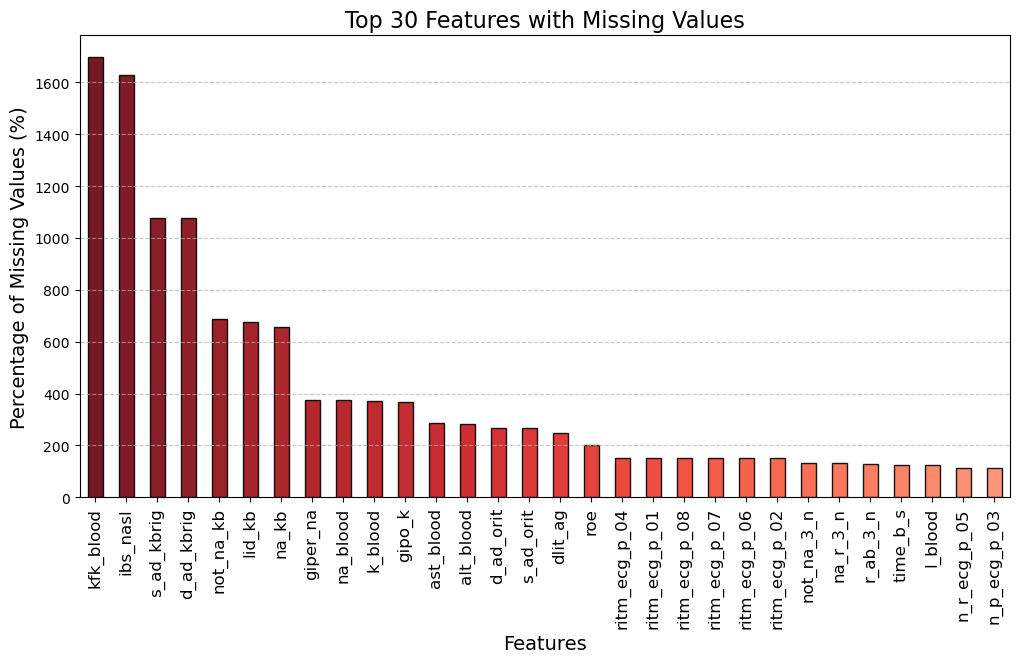

In [4]:
import matplotlib.pyplot as plt

# Bar Chart of Missing Proportions with Reverse Gradient Red Color
plt.figure(figsize=(12, 6))
nan_counts_sorted.sort_values(ascending=False).head(30).plot(
    kind='bar', 
    color=plt.cm.Reds(np.linspace(1, 0.4, 30)),  # Reverse gradient
    edgecolor='black', 
    alpha=0.9
)
plt.title("Top 30 Features with Missing Values", fontsize=16)
plt.ylabel("Percentage of Missing Values (%)", fontsize=14)
plt.xlabel("Features", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

In [5]:
# Select columns with less than 500 missing values
columns_with_few_nan = nan_counts[nan_counts < 500].index

# Filter the data to keep only these columns
filtered_data = data[columns_with_few_nan]

# Display the column names and dimensions after filtering
print("Columns after filtering:", filtered_data.columns.tolist())
print("Data dimensions after filtering:", filtered_data.shape)

filtered_data.dropna().head()

Columns after filtering: ['age', 'sex', 'inf_anam', 'stenok_an', 'fk_stenok', 'ibs_post', 'gb', 'sim_gipert', 'dlit_ag', 'zsn_a', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 's_ad_orit', 'd_ad_orit', 'o_l_post', 'k_sh_post', 'mp_tp_post', 'svt_post', 'gt_post', 'fib_g_post', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'im_pg_p', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05',

,age,sex,inf_anam,stenok_an,fk_stenok,ibs_post,gb,sim_gipert,dlit_ag,zsn_a,...,jelud_tah,fibr_jelud,a_v_blok,otek_lanc,razriv,dressler,zsn,rec_im,p_im_sten,let_is
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10,71.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
11,50.0,0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,1,0,0
13,57.0,1,0.0,0.0,0.0,2.0,2.0,0.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
14,55.0,1,1.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Deal with NaN
Different imputation strategies can be chosen for continuous and categorical variables:
Imputation Strategies:

1. Mean Imputation (suitable for continuous variables):

    Fills missing values with the mean of the feature.


2. Median Imputation (suitable for continuous variables, works better with outliers):

    Fills missing values with the median of the feature.


3. Mode Imputation (suitable for categorical variables):

    Fills missing values with the mode (most frequent value) of the feature.

In [6]:
data = pd.read_csv('myocardial_infarction.csv')
data = data.drop(columns=['id'])

row_missing_ratio = data.isnull().mean(axis=1)
data = data[row_missing_ratio < 0.2]

In [7]:
# Calculate missing value ratio
missing_ratio = nan_counts / len(data)

# Categorize handling strategies
low_missing = missing_ratio[missing_ratio < 0.05].index  # Missing ratio < 5%
medium_missing = missing_ratio[(missing_ratio >= 0.05) & (missing_ratio <= 0.3)].index  # Missing ratio 5%-30%
high_missing = missing_ratio[missing_ratio > 0.3].index  # Missing ratio > 30%

from sklearn.impute import SimpleImputer

# Separate continuous and categorical variables
continuous_vars = data.select_dtypes(include=['float64']).columns  # Continuous variables
categorical_vars = data.select_dtypes(exclude=['float64']).columns  # Categorical variables

# Check if categorical variables exist
if not categorical_vars.empty:
    # Impute continuous variables: using median
    median_imputer = SimpleImputer(strategy='median')
    data[continuous_vars] = median_imputer.fit_transform(data[continuous_vars])

    # Impute categorical variables: using mode
    mode_imputer = SimpleImputer(strategy='most_frequent')
    data[categorical_vars] = mode_imputer.fit_transform(data[categorical_vars])
else:
    print("No categorical variables detected. Only processing continuous variables.")

# Drop columns with high missing ratio (>30%)
high_missing_existing = [col for col in high_missing if col in data.columns]  # Check for actually existing columns
data = data.drop(columns=high_missing_existing)

data.head()

,age,sex,inf_anam,stenok_an,fk_stenok,ibs_post,gb,sim_gipert,dlit_ag,zsn_a,...,jelud_tah,fibr_jelud,a_v_blok,otek_lanc,razriv,dressler,zsn,rec_im,p_im_sten,let_is
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# train-test split

In [8]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets using train_test_split
data, test_set = train_test_split(data, test_size=0.2, random_state=44)

# Save training and test sets to CSV files
data.to_csv('train_original.csv')
test_set.to_csv("test_original.csv")

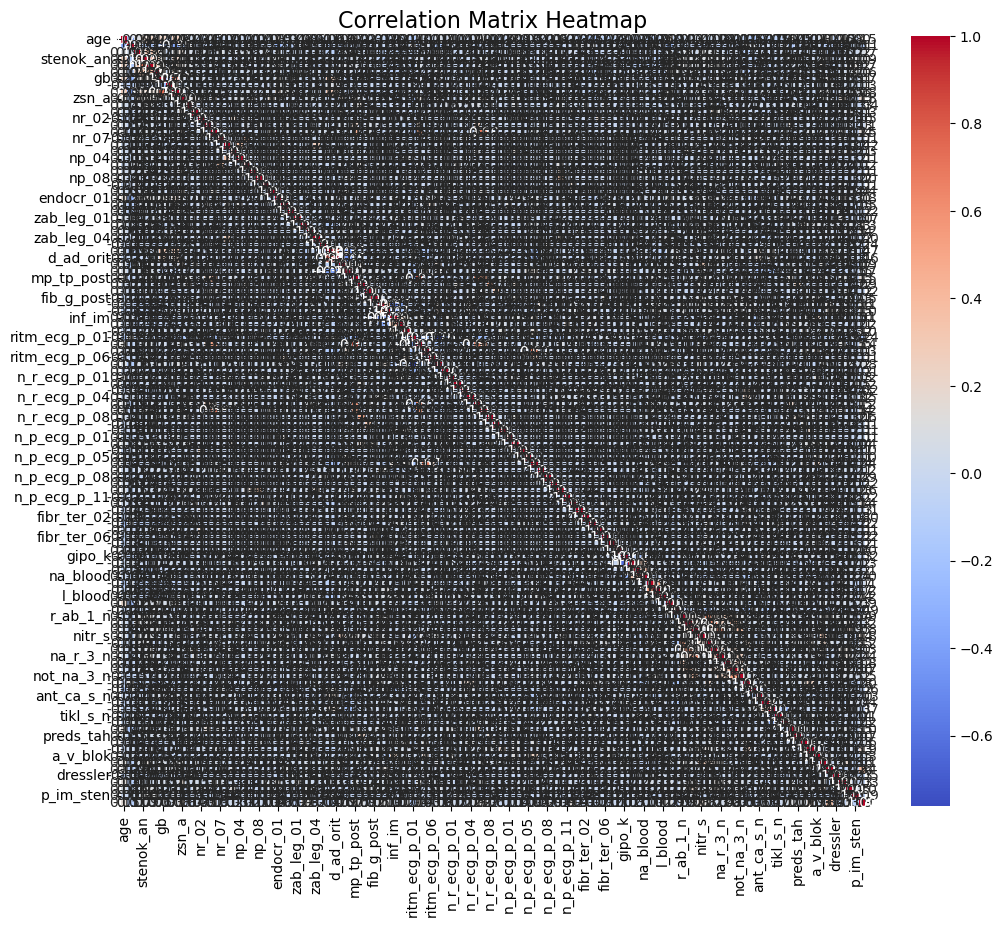

In [9]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = data.corr()

# Create heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, 
    annot=True,    # Display correlation coefficients
    fmt=".2f",     # Show two decimal places
    cmap="coolwarm",  # Use red-blue gradient colormap
    cbar=True      # Add a color bar
)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

# VIF

In [10]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define function to calculate VIF
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['feature'] = data.columns
    vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# Check if target variable exists
if 'let_is' in data.columns:
    # Separate features and target variable
    X = data.drop(columns=['let_is'])
    y = data['let_is']

    # Remove missing values (for VIF calculation)
    X_cleaned = X.dropna()

    # Calculate VIF
    vif = calculate_vif(X_cleaned)

    # Select features with VIF <= 5
    features_to_keep = vif[vif['VIF'] <= 5]['feature']
    X_selected = X_cleaned[features_to_keep]

    # Output filtering results
    print("Original number of features:", X_cleaned.shape[1])
    print("Number of features after filtering:", X_selected.shape[1])
    print("\nFeatures after filtering:\n", X_selected.columns.tolist())
    print("\nVIF values for features:\n", vif)
else:
    print("Target variable 'let_is' not found, please check the data.")

Original number of features: 115
Number of features after filtering: 100

Features after filtering:
 ['sex', 'inf_anam', 'stenok_an', 'ibs_post', 'sim_gipert', 'zsn_a', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'o_l_post', 'k_sh_post', 'mp_tp_post', 'svt_post', 'gt_post', 'fib_g_post', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'im_pg_p', 'ritm_ecg_p_06', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'gipo_k', 'giper_na', 'alt

In [11]:
features_to_keep = pd.concat([features_to_keep,pd.Series('let_is')],ignore_index=True)
X_selected = data[features_to_keep]
X_selected = X_selected.reset_index(drop=True)
X_selected

,sex,inf_anam,stenok_an,ibs_post,sim_gipert,zsn_a,nr_11,nr_01,nr_02,nr_03,...,jelud_tah,fibr_jelud,a_v_blok,otek_lanc,razriv,dressler,zsn,rec_im,p_im_sten,let_is
0,0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,1.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,1,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1248,1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1249,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1250,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_selected.to_csv('data_after_vif_resetIndex.csv') # training set 

# Part3

In [13]:
### Use RFE

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Load the training and test datasets
train_file_path = 'data_after_vif.csv'  # Training data
mi1_data = pd.read_csv(train_file_path)

test_file_path = 'test_original.csv'  # Testing data
test_data = pd.read_csv(test_file_path)

# Remove the "Unnamed: 0" column if it exists (it's the index column)
mi1_data = mi1_data.loc[:, ~mi1_data.columns.str.contains("Unnamed", case=False)]
test_data = test_data.loc[:, ~test_data.columns.str.contains("Unnamed", case=False)]

# Prepare the training data: Separate predictors and target variable
X_train = mi1_data.drop(columns=["let_is"])  # Drop target variable
y_train = mi1_data["let_is"]  # Target variable

# Standardize predictors in the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Perform Recursive Feature Elimination (RFE) with logistic regression on training data
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
rfe = RFE(log_reg, n_features_to_select=8)  # Select top 5 features
rfe.fit(X_train_scaled, y_train)
X_train_rfe = X_train_scaled.loc[:, rfe.support_]

# Get selected feature names from the training data
selected_features = X_train_rfe.columns.tolist()

# Prepare the test data: Separate predictors and target variable
X_test = test_data.drop(columns=["let_is"], errors='ignore')  # Drop target variable
y_test = test_data["let_is"]  # Target variable

# Ensure the test data contains all features used in training
# Add missing features with default value 0
for feature in X_train.columns:
    if feature not in X_test.columns:
        X_test[feature] = 0

# Reorder the test data columns to match the training data
X_test = X_test[X_train.columns]

# Standardize the test data using the same scaler
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# Select the same features in the test data
X_test_rfe = X_test_scaled[selected_features]

# Fit logistic regression model with selected features
log_reg.fit(X_train_rfe, y_train)

# Evaluate the model on the test set
test_accuracy = log_reg.score(X_test_rfe, y_test)

# Display results
print("Selected Features:", selected_features)
print("Test Accuracy:", test_accuracy)


Selected Features: ['sex', 'zsn_a', 'zab_leg_01', 'b_blok_s_n', 'otek_lanc', 'razriv', 'zsn', 'p_im_sten']
Test Accuracy: 0.8821656050955414


In [14]:
### Use Cross-Validation

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
file_path = 'data_after_vif_resetIndex.csv'
mi1_data = pd.read_csv(file_path)

# Prepare data: Separate predictors and target variable
X = mi1_data.drop(columns=["let_is"])  # Drop target variable
y = mi1_data["let_is"]  # Target variable

# Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform feature selection using SelectKBest with CV
k_features = 20  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k_features)
X_selected = selector.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train logistic regression with cross-validation
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Fit logistic regression model on the full training set
log_reg.fit(X_train, y_train)

# Evaluate model on the test set
test_accuracy = log_reg.score(X_test, y_test)

# Display results
print(f"Selected Features: {selected_features}")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Selected Features: ['sex', 'zsn_a', 'nr_01', 'nr_04', 'o_l_post', 'k_sh_post', 'mp_tp_post', 'ant_im', 'lat_im', 'n_r_ecg_p_05', 'n_p_ecg_p_12', 'r_ab_1_n', 'r_ab_3_n', 'nitr_s', 'na_r_1_n', 'ant_ca_s_n', 'fibr_jelud', 'otek_lanc', 'zsn', 'rec_im']
Cross-Validation Accuracy: 0.8422
Test Accuracy: 0.8645


In [15]:
### Use Stratified Cross-Validation
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
file_path = 'data_after_vif_resetIndex.csv'
mi1_data = pd.read_csv(file_path)

# Prepare data: Separate predictors and target variable
X = mi1_data.drop(columns=["let_is"])  # Drop target variable
y = mi1_data["let_is"]  # Target variable

# Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform feature selection using SelectKBest
k_features = 20  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k_features)
X_selected = selector.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Train multinomial logistic regression with stratified cross-validation
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)

# Use StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Fit logistic regression model on the full training set
log_reg.fit(X_train, y_train)

# Evaluate model on the test set
test_accuracy = log_reg.score(X_test, y_test)

# Display results
print(f"Selected Features: {selected_features}")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Selected Features: ['sex', 'zsn_a', 'nr_01', 'nr_04', 'o_l_post', 'k_sh_post', 'mp_tp_post', 'ant_im', 'lat_im', 'n_r_ecg_p_05', 'n_p_ecg_p_12', 'r_ab_1_n', 'r_ab_3_n', 'nitr_s', 'na_r_1_n', 'ant_ca_s_n', 'fibr_jelud', 'otek_lanc', 'zsn', 'rec_im']
Cross-Validation Accuracy: 0.8561
Test Accuracy: 0.8327


Top 20 Features by Mean Decrease in Gini:
         Feature  Importance
96        razriv    0.135493
30     k_sh_post    0.063927
0     Unnamed: 0    0.045393
72           roe    0.041370
71     ast_blood    0.036752
73      time_b_s    0.031617
70     alt_blood    0.031206
3      stenok_an    0.028370
78      na_r_1_n    0.028088
6          zsn_a    0.023555
35        ant_im    0.020452
2       inf_anam    0.019925
36        lat_im    0.017585
77        nitr_s    0.017331
60  n_p_ecg_p_12    0.017115
4       ibs_post    0.016618
74      r_ab_1_n    0.016401
37        inf_im    0.016205
86    ant_ca_s_n    0.015553
95     otek_lanc    0.015392


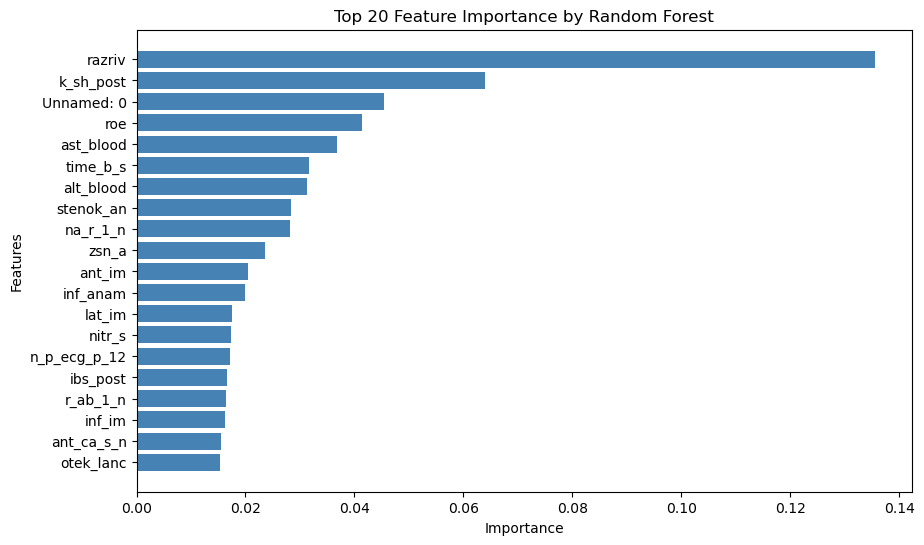

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please a

Confusion Matrix:
[[210   0   0   0   1   0   0   0]
 [ 11   4   0   0   0   0   0   0]
 [  1   1   0   0   0   0   0   0]
 [  0   0   0   9   0   0   0   0]
 [  4   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0]
 [  4   0   0   0   1   0   0   0]]
Cross-Validation Accuracy: 0.8801
Test Accuracy: 0.8884


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
### Logistic Regression using 20 features from Random Forest

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = "data_after_vif_resetIndex.csv"  # Replace with your dataset path
mi1_data = pd.read_csv(file_path)

# Ensure the target variable is categorical
target_var = "let_is"
mi1_data[target_var] = mi1_data[target_var].astype("category")

# Split the dataset into an 80% training set and a 20% testing set
train_data, test_data = train_test_split(mi1_data, test_size=0.2, random_state=42, stratify=mi1_data[target_var])

# Fit a Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=500,  # Number of trees
    max_features="sqrt",  # Features at each split
    random_state=42,
    n_jobs=-1  # Use all processors
)
rf_model.fit(train_data.drop(columns=[target_var]), train_data[target_var])

# Extract feature importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": train_data.drop(columns=[target_var]).columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Display the top 20 features
top_features_rf = importance_df.head(20)
print("Top 20 Features by Mean Decrease in Gini:")
print(top_features_rf)

# Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features_rf["Feature"], top_features_rf["Importance"], color="steelblue")
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importance by Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Subset the training and testing data with top features
top_features = top_features_rf["Feature"].tolist()
train_data_top = train_data[top_features + [target_var]]
test_data_top = test_data[top_features + [target_var]]

# Train multinomial logistic regression with stratified cross-validation
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)

# Use StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg, train_data_top.drop(columns=[target_var]), train_data_top[target_var], cv=stratified_kfold, scoring="accuracy")

# Train logistic regression on the full training set
log_reg.fit(train_data_top.drop(columns=[target_var]), train_data_top[target_var])

# Make predictions on the test set
predictions = log_reg.predict(test_data_top.drop(columns=[target_var]))

# Evaluate the model
conf_matrix = confusion_matrix(test_data_top[target_var], predictions)
accuracy = accuracy_score(test_data_top[target_var], predictions)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


In [17]:
print(f"Number of Features Selected by Logistic Regression: {len(top_features)}")

Number of Features Selected by Logistic Regression: 20


Top 20 Features by Mean Decrease in Gini:
         Feature  Importance
96        razriv    0.135493
30     k_sh_post    0.063927
0     Unnamed: 0    0.045393
72           roe    0.041370
71     ast_blood    0.036752
73      time_b_s    0.031617
70     alt_blood    0.031206
3      stenok_an    0.028370
78      na_r_1_n    0.028088
6          zsn_a    0.023555
35        ant_im    0.020452
2       inf_anam    0.019925
36        lat_im    0.017585
77        nitr_s    0.017331
60  n_p_ecg_p_12    0.017115
4       ibs_post    0.016618
74      r_ab_1_n    0.016401
37        inf_im    0.016205
86    ant_ca_s_n    0.015553
95     otek_lanc    0.015392


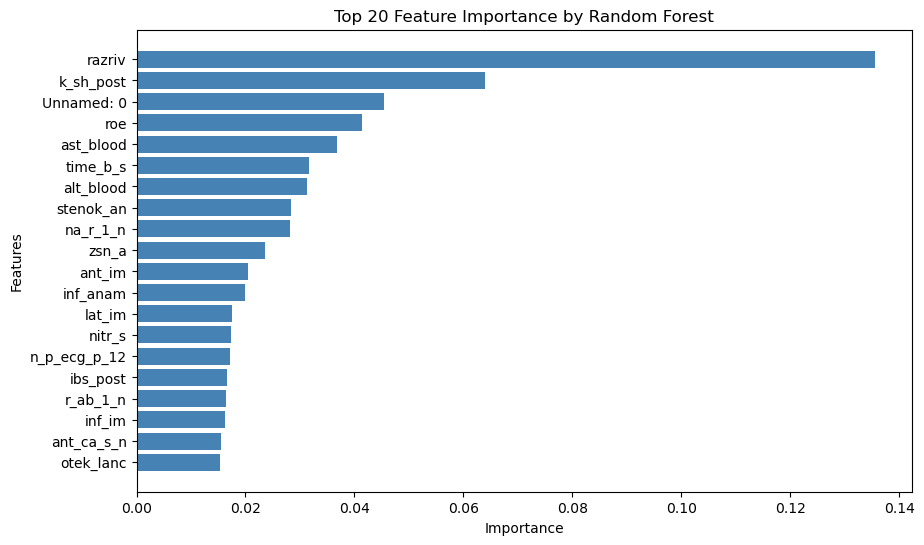

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Further Refined Features Selected by Logistic Regression: ['razriv', 'k_sh_post', 'alt_blood', 'zsn_a', 'inf_anam', 'nitr_s', 'n_p_ecg_p_12', 'otek_lanc']
Cross-Validation Accuracy with Refined Features: 0.8931
Refined Confusion Matrix:
[[210   0   0   0   1   0   0   0]
 [ 12   3   0   0   0   0   0   0]
 [  1   1   0   0   0   0   0   0]
 [  0   0   0   9   0   0   0   0]
 [  4   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0]]
Test Accuracy with Refined Features: 0.8845


In [18]:
### Further predictor selection after Random Forest

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = "data_after_vif_resetIndex.csv"  # Replace with your dataset path
mi1_data = pd.read_csv(file_path)

# Ensure the target variable is categorical
target_var = "let_is"
mi1_data[target_var] = mi1_data[target_var].astype("category")

# Split the dataset into an 80% training set and a 20% testing set
train_data, test_data = train_test_split(mi1_data, test_size=0.2, random_state=42, stratify=mi1_data[target_var])

# Fit a Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=500,  # Number of trees
    max_features="sqrt",  # Features at each split
    random_state=42,
    n_jobs=-1  # Use all processors
)
rf_model.fit(train_data.drop(columns=[target_var]), train_data[target_var])

# Extract feature importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": train_data.drop(columns=[target_var]).columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Display the top 20 features
top_features_rf = importance_df.head(20)
print("Top 20 Features by Mean Decrease in Gini:")
print(top_features_rf)

# Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features_rf["Feature"], top_features_rf["Importance"], color="steelblue")
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importance by Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Subset the training and testing data with top features
top_features = top_features_rf["Feature"].tolist()
train_data_top = train_data[top_features + [target_var]]
test_data_top = test_data[top_features + [target_var]]

# Train multinomial logistic regression with stratified cross-validation
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)

# Step 1: Apply RFE to refine the 20 features selected by Random Forest
rfe = RFE(log_reg, n_features_to_select=8)  # Choose the number of features to keep (e.g., 8)
X_train_rfe = rfe.fit_transform(train_data_top.drop(columns=[target_var]), train_data_top[target_var])

# Get the names of the further refined features
refined_features = [feature for feature, selected in zip(top_features, rfe.support_) if selected]
print(f"Further Refined Features Selected by Logistic Regression: {refined_features}")

# Step 2: Perform cross-validation with the refined features
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_refined = cross_val_score(log_reg, X_train_rfe, train_data_top[target_var], cv=stratified_kfold, scoring="accuracy")
print(f"Cross-Validation Accuracy with Refined Features: {cv_scores_refined.mean():.4f}")

# Step 3: Train the final logistic regression model with the refined features
log_reg.fit(X_train_rfe, train_data_top[target_var])

# Step 4: Evaluate the model on the test set
X_test_rfe = test_data_top[refined_features].values
predictions_refined = log_reg.predict(X_test_rfe)

# Confusion matrix and accuracy
conf_matrix_refined = confusion_matrix(test_data_top[target_var], predictions_refined)
accuracy_refined = accuracy_score(test_data_top[target_var], predictions_refined)

print("Refined Confusion Matrix:")
print(conf_matrix_refined)
print(f"Test Accuracy with Refined Features: {accuracy_refined:.4f}")

In [19]:
### RFE loop

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'data_after_vif_resetIndex.csv'
mi1_data = pd.read_csv(file_path)

# Prepare data: Separate predictors and target variable
X = mi1_data.drop(columns=["let_is"])  # Drop target variable
y = mi1_data["let_is"]  # Target variable

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize variables to track the best accuracy and corresponding number of features
best_accuracy = 0
best_num_features = 0
best_selected_features = []

# Evaluate specific numbers of features: 5, 10, and 15
for n_features in [5, 10, 15]:  
    # Perform RFE with the current number of features
    log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
    rfe = RFE(log_reg, n_features_to_select=n_features)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    
    # Fit logistic regression model with the selected features
    log_reg.fit(X_train_rfe, y_train)
    
    # Predict on the test set and calculate accuracy
    predictions = log_reg.predict(X_test_rfe)
    accuracy = accuracy_score(y_test, predictions)
    
    # Update the best accuracy and corresponding number of features
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_num_features = n_features
        best_selected_features = X.columns[rfe.support_].tolist()

    # Display results for the current number of features
    print(f"Number of Features: {n_features}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Selected Features: {X.columns[rfe.support_].tolist()}\n")

# Display the overall best results
print(f"Best Test Accuracy: {best_accuracy:.4f}")
print(f"Optimal Number of Features: {best_num_features}")
print(f"Selected Features: {best_selected_features}")

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please a

Number of Features: 5
Test Accuracy: 0.9124
Selected Features: ['k_sh_post', 'fibr_jelud', 'otek_lanc', 'razriv', 'zsn']



/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please a

Number of Features: 10
Test Accuracy: 0.9124
Selected Features: ['sex', 'k_sh_post', 'im_pg_p', 'n_p_ecg_p_12', 'r_ab_3_n', 'nitr_s', 'fibr_jelud', 'otek_lanc', 'razriv', 'zsn']



/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please a

Number of Features: 15
Test Accuracy: 0.9124
Selected Features: ['sex', 'k_sh_post', 'mp_tp_post', 'im_pg_p', 'n_r_ecg_p_03', 'n_p_ecg_p_12', 'alt_blood', 'r_ab_3_n', 'nitr_s', 'fibr_preds', 'fibr_jelud', 'otek_lanc', 'razriv', 'zsn', 'p_im_sten']

Best Test Accuracy: 0.9124
Optimal Number of Features: 5
Selected Features: ['k_sh_post', 'fibr_jelud', 'otek_lanc', 'razriv', 'zsn']


KeyboardInterrupt: 

In [20]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!### Use RFE
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Load the training and test datasets
train_file_path = 'data_after_vif.csv'  # Training data
mi1_data = pd.read_csv(train_file_path)

test_file_path = 'test_original.csv'  # Testing data
test_data = pd.read_csv(test_file_path)

# Remove the "Unnamed: 0" column if it exists (it's the index column)
mi1_data = mi1_data.loc[:, ~mi1_data.columns.str.contains("Unnamed", case=False)]
test_data = test_data.loc[:, ~test_data.columns.str.contains("Unnamed", case=False)]

# Prepare the training data: Separate predictors and target variable
X_train = mi1_data.drop(columns=["let_is"])  # Drop target variable
y_train = mi1_data["let_is"]  # Target variable

# Standardize predictors in the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Prepare the test data: Separate predictors and target variable
X_test = test_data.drop(columns=["let_is"], errors='ignore')  # Drop target variable
y_test = test_data["let_is"]  # Target variable

# Ensure the test data contains all features used in training
for feature in X_train.columns:
    if feature not in X_test.columns:
        X_test[feature] = 0

# Reorder the test data columns to match the training data
X_test = X_test[X_train.columns]

# Standardize the test data using the same scaler
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# Initialize variables to track the optimal number of features and accuracy
optimal_num_features = 0
max_accuracy = 0
optimal_features = []

# Loop through different numbers of features
results = []
for num_features in range(1, X_train.shape[1] + 1):  # 1 to total number of features
    log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
    rfe = RFE(log_reg, n_features_to_select=num_features)
    rfe.fit(X_train_scaled, y_train)
    
    # Get the selected features for the current number of features
    selected_features = X_train_scaled.columns[rfe.support_].tolist()
    
    # Prepare the training and test data with the selected features
    X_train_rfe = X_train_scaled[selected_features]
    X_test_rfe = X_test_scaled[selected_features]
    
    # Train the logistic regression model
    log_reg.fit(X_train_rfe, y_train)
    
    # Evaluate the model on the test set
    test_accuracy = log_reg.score(X_test_rfe, y_test)
    results.append((num_features, test_accuracy))
    
    # Update optimal number of features if current accuracy is the best
    if test_accuracy > max_accuracy:
        max_accuracy = test_accuracy
        optimal_num_features = num_features
        optimal_features = selected_features

# Display the results
print("Optimal Number of Features:", optimal_num_features)
print("Selected Features:", optimal_features)
print("Max Test Accuracy:", max_accuracy)

# Optional: Display all results for reference
for num, acc in results:
    print(f"Number of Features: {num}, Test Accuracy: {acc}")


Optimal Number of Features: 42
Selected Features: ['sex', 'inf_anam', 'stenok_an', 'ibs_post', 'sim_gipert', 'zsn_a', 'nr_11', 'nr_03', 'nr_04', 'endocr_01', 'endocr_02', 'zab_leg_01', 'zab_leg_02', 'k_sh_post', 'mp_tp_post', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'im_pg_p', 'n_r_ecg_p_03', 'n_r_ecg_p_06', 'n_p_ecg_p_12', 'gipo_k', 'alt_blood', 'ast_blood', 'roe', 'time_b_s', 'r_ab_1_n', 'r_ab_2_n', 'r_ab_3_n', 'nitr_s', 'not_na_2_n', 'b_blok_s_n', 'ant_ca_s_n', 'gepar_s_n', 'jelud_tah', 'fibr_jelud', 'otek_lanc', 'razriv', 'zsn', 'p_im_sten']
Max Test Accuracy: 0.9012738853503185
Number of Features: 1, Test Accuracy: 0.8821656050955414
Number of Features: 2, Test Accuracy: 0.8821656050955414
Number of Features: 3, Test Accuracy: 0.8821656050955414
Number of Features: 4, Test Accuracy: 0.8821656050955414
Number of Features: 5, Test Accuracy: 0.8821656050955414
Number of Features: 6, Test Accuracy: 0.8821656050955414
Number of Features: 7, Test Accuracy: 0.8821656050955414
Number of F

In [21]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!CV
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
train_file_path = 'data_after_vif.csv'  # Training data
test_file_path = 'test_original.csv'  # Testing data

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Remove the "Unnamed: 0" column if it exists
train_data = train_data.loc[:, ~train_data.columns.str.contains("Unnamed", case=False)]
test_data = test_data.loc[:, ~test_data.columns.str.contains("Unnamed", case=False)]

# Separate predictors and target variable in training data
X_train = train_data.drop(columns=["let_is"])  # Drop target variable
y_train = train_data["let_is"]  # Target variable

# Separate predictors and target variable in testing data
X_test = test_data.drop(columns=["let_is"], errors='ignore')  # Drop target variable
y_test = test_data["let_is"]  # Target variable

# Ensure the test data contains all features used in training
for feature in X_train.columns:
    if feature not in X_test.columns:
        X_test[feature] = 0  # Add missing features with a default value of 0

# Reorder the test data columns to match the training data
X_test = X_test[X_train.columns]

# Standardize predictors in training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize variables to track the optimal number of features and accuracy
optimal_num_features = 0
max_accuracy = 0
optimal_features = []

# Loop through different numbers of features to select
results = []
for k_features in range(1, X_train.shape[1] + 1):  # 1 to total number of features
    # Perform feature selection
    selector = SelectKBest(score_func=f_classif, k=k_features)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)
    
    # Get selected feature names
    selected_features = X_train.columns[selector.get_support()].tolist()
    
    # Train logistic regression model
    log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
    log_reg.fit(X_train_selected, y_train)
    
    # Evaluate the model on the test set
    test_accuracy = log_reg.score(X_test_selected, y_test)
    results.append((k_features, test_accuracy))
    
    # Update optimal number of features if current test accuracy is the best
    if test_accuracy > max_accuracy:
        max_accuracy = test_accuracy
        optimal_num_features = k_features
        optimal_features = selected_features

# Display the results
print(f"Optimal Number of Features: {optimal_num_features}")
print(f"Selected Features: {optimal_features}")
print(f"Max Test Accuracy: {max_accuracy:.4f}")

# Optional: Display all results for reference
for num, acc in results:
    print(f"Number of Features: {num}, Test Accuracy: {acc:.4f}")


Optimal Number of Features: 1
Selected Features: ['k_sh_post']
Max Test Accuracy: 0.8726
Number of Features: 1, Test Accuracy: 0.8726
Number of Features: 2, Test Accuracy: 0.8726
Number of Features: 3, Test Accuracy: 0.8662
Number of Features: 4, Test Accuracy: 0.8662
Number of Features: 5, Test Accuracy: 0.8567
Number of Features: 6, Test Accuracy: 0.8599
Number of Features: 7, Test Accuracy: 0.8567
Number of Features: 8, Test Accuracy: 0.8631
Number of Features: 9, Test Accuracy: 0.8631
Number of Features: 10, Test Accuracy: 0.8599
Number of Features: 11, Test Accuracy: 0.8599
Number of Features: 12, Test Accuracy: 0.8631
Number of Features: 13, Test Accuracy: 0.8631
Number of Features: 14, Test Accuracy: 0.8599
Number of Features: 15, Test Accuracy: 0.8631
Number of Features: 16, Test Accuracy: 0.8631
Number of Features: 17, Test Accuracy: 0.8631
Number of Features: 18, Test Accuracy: 0.8567
Number of Features: 19, Test Accuracy: 0.8567
Number of Features: 20, Test Accuracy: 0.8535


In [22]:
# !!!!!!!!!!!!!!str_cv
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
train_file_path = 'data_after_vif.csv'  # Training data
test_file_path = 'test_original.csv'  # Testing data

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Remove the "Unnamed: 0" column if it exists
train_data = train_data.loc[:, ~train_data.columns.str.contains("Unnamed", case=False)]
test_data = test_data.loc[:, ~test_data.columns.str.contains("Unnamed", case=False)]

# Separate predictors and target variable in training data
X_train = train_data.drop(columns=["let_is"])  # Drop target variable
y_train = train_data["let_is"]  # Target variable

# Separate predictors and target variable in testing data
X_test = test_data.drop(columns=["let_is"], errors='ignore')  # Drop target variable
y_test = test_data["let_is"]  # Target variable

# Ensure the test data contains all features used in training
for feature in X_train.columns:
    if feature not in X_test.columns:
        X_test[feature] = 0  # Add missing features with a default value of 0

# Reorder the test data columns to match the training data
X_test = X_test[X_train.columns]

# Standardize predictors in training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize variables to track the optimal number of features and accuracy
optimal_num_features = 0
max_cv_accuracy = 0
optimal_features = []

# Loop through different numbers of features to select
results = []
for k_features in range(1, X_train.shape[1] + 1):  # 1 to total number of features
    # Perform feature selection
    selector = SelectKBest(score_func=f_classif, k=k_features)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)
    selected_features = X_train.columns[selector.get_support()].tolist()
    
    # Train multinomial logistic regression with stratified cross-validation
    log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(log_reg, X_train_selected, y_train, cv=stratified_kfold, scoring='accuracy')
    
    # Calculate mean cross-validation accuracy
    mean_cv_accuracy = cv_scores.mean()
    results.append((k_features, mean_cv_accuracy))
    
    # Update optimal number of features if current CV accuracy is the best
    if mean_cv_accuracy > max_cv_accuracy:
        max_cv_accuracy = mean_cv_accuracy
        optimal_num_features = k_features
        optimal_features = selected_features

# Evaluate model with the optimal number of features on the test set
selector = SelectKBest(score_func=f_classif, k=optimal_num_features)
X_train_selected_optimal = selector.fit_transform(X_train_scaled, y_train)
X_test_selected_optimal = selector.transform(X_test_scaled)

log_reg.fit(X_train_selected_optimal, y_train)
test_accuracy = log_reg.score(X_test_selected_optimal, y_test)

# Display results
print(f"Optimal Number of Features: {optimal_num_features}")
print(f"Selected Features: {optimal_features}")
print(f"Max Cross-Validation Accuracy: {max_cv_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Optional: Display all results for reference
for num, acc in results:
    print(f"Number of Features: {num}, Cross-Validation Accuracy: {acc:.4f}")


Optimal Number of Features: 4
Selected Features: ['zsn_a', 'nr_01', 'k_sh_post', 'fibr_jelud']
Max Cross-Validation Accuracy: 0.8586
Test Accuracy: 0.8662
Number of Features: 1, Cross-Validation Accuracy: 0.8570
Number of Features: 2, Cross-Validation Accuracy: 0.8570
Number of Features: 3, Cross-Validation Accuracy: 0.8570
Number of Features: 4, Cross-Validation Accuracy: 0.8586
Number of Features: 5, Cross-Validation Accuracy: 0.8538
Number of Features: 6, Cross-Validation Accuracy: 0.8546
Number of Features: 7, Cross-Validation Accuracy: 0.8546
Number of Features: 8, Cross-Validation Accuracy: 0.8531
Number of Features: 9, Cross-Validation Accuracy: 0.8546
Number of Features: 10, Cross-Validation Accuracy: 0.8554
Number of Features: 11, Cross-Validation Accuracy: 0.8554
Number of Features: 12, Cross-Validation Accuracy: 0.8546
Number of Features: 13, Cross-Validation Accuracy: 0.8538
Number of Features: 14, Cross-Validation Accuracy: 0.8506
Number of Features: 15, Cross-Validation A

In [23]:
# !!!!!!!!!!!!!!rf+log
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score

# Load the dataset
train_file_path = 'data_after_vif.csv'
test_file_path = 'test_original.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Remove the "Unnamed: 0" column if it exists
train_data = train_data.loc[:, ~train_data.columns.str.contains("Unnamed", case=False)]
test_data = test_data.loc[:, ~test_data.columns.str.contains("Unnamed", case=False)]

# Separate predictors and target variable in training data
X_train = train_data.drop(columns=["let_is"])  # Drop target variable
y_train = train_data["let_is"]  # Target variable

# Separate predictors and target variable in testing data
X_test = test_data.drop(columns=["let_is"], errors='ignore')  # Drop target variable
y_test = test_data["let_is"]  # Target variable

# Ensure the test data contains all features used in training
for feature in X_train.columns:
    if feature not in X_test.columns:
        X_test[feature] = 0  # Add missing features with a default value of 0

# Reorder the test data columns to match the training data
X_test = X_test[X_train.columns]

# Standardize predictors in training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Random Forest for Feature Selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Extract feature importance and select top features
importances = rf.feature_importances_
sorted_indices = importances.argsort()[::-1]  # Sort features by importance (descending)

# Select top 20% of features based on importance
top_features = int(0.2 * X_train.shape[1])  # Adjust the percentage if needed
selected_feature_indices = sorted_indices[:top_features]
selected_features_rf = X_train.columns[selected_feature_indices].tolist()

# Reduce training and testing datasets to the top features
X_train_rf = X_train_scaled[:, selected_feature_indices]
X_test_rf = X_test_scaled[:, selected_feature_indices]

# Step 2: Logistic Regression for Optimal Feature Selection
optimal_num_features = 0
max_cv_accuracy = 0
optimal_features = []

# Loop through different numbers of features to select
results = []
for k_features in range(1, X_train_rf.shape[1] + 1):  # 1 to number of features selected by Random Forest
    # Perform RFE with Logistic Regression
    log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
    rfe = RFE(log_reg, n_features_to_select=k_features)
    X_train_selected = rfe.fit_transform(X_train_rf, y_train)
    X_test_selected = rfe.transform(X_test_rf)
    selected_features = [selected_features_rf[i] for i, support in enumerate(rfe.support_) if support]
    
    # Stratified cross-validation
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(log_reg, X_train_selected, y_train, cv=stratified_kfold, scoring='accuracy')
    
    # Calculate mean CV accuracy
    mean_cv_accuracy = cv_scores.mean()
    results.append((k_features, mean_cv_accuracy))
    
    # Update optimal number of features if current CV accuracy is the best
    if mean_cv_accuracy > max_cv_accuracy:
        max_cv_accuracy = mean_cv_accuracy
        optimal_num_features = k_features
        optimal_features = selected_features

# Evaluate model with the optimal number of features on the test set
log_reg.fit(X_train_selected, y_train)
test_accuracy = log_reg.score(X_test_selected, y_test)

# Display results
print(f"Step 1 - Features Selected by Random Forest: {selected_features_rf}")
print(f"Optimal Number of Features (Step 2): {optimal_num_features}")
print(f"Selected Features (Step 2): {optimal_features}")
print(f"Max Cross-Validation Accuracy: {max_cv_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Optional: Display all results for reference
for num, acc in results:
    print(f"Number of Features: {num}, Cross-Validation Accuracy: {acc:.4f}")


Step 1 - Features Selected by Random Forest: ['razriv', 'k_sh_post', 'roe', 'ast_blood', 'alt_blood', 'time_b_s', 'stenok_an', 'zsn_a', 'na_r_1_n', 'lat_im', 'nitr_s', 'ant_im', 'inf_im', 'inf_anam', 'ibs_post', 'r_ab_1_n', 'otek_lanc', 'not_na_1_n', 'ant_ca_s_n', 'n_p_ecg_p_12']
Optimal Number of Features (Step 2): 4
Selected Features (Step 2): ['razriv', 'k_sh_post', 'zsn_a', 'otek_lanc']
Max Cross-Validation Accuracy: 0.8938
Test Accuracy: 0.8917
Number of Features: 1, Cross-Validation Accuracy: 0.8762
Number of Features: 2, Cross-Validation Accuracy: 0.8762
Number of Features: 3, Cross-Validation Accuracy: 0.8770
Number of Features: 4, Cross-Validation Accuracy: 0.8938
Number of Features: 5, Cross-Validation Accuracy: 0.8938
Number of Features: 6, Cross-Validation Accuracy: 0.8938
Number of Features: 7, Cross-Validation Accuracy: 0.8938
Number of Features: 8, Cross-Validation Accuracy: 0.8938
Number of Features: 9, Cross-Validation Accuracy: 0.8938
Number of Features: 10, Cross-Val

In [24]:
# !!!!!!!!!!!!!!!!pure non para
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Load the dataset
train_file_path = 'data_after_vif.csv'
test_file_path = 'test_original.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Remove the "Unnamed: 0" column if it exists
train_data = train_data.loc[:, ~train_data.columns.str.contains("Unnamed", case=False)]
test_data = test_data.loc[:, ~test_data.columns.str.contains("Unnamed", case=False)]

# Separate predictors and target variable in training data
X_train = train_data.drop(columns=["let_is"])  # Drop target variable
y_train = train_data["let_is"]  # Target variable

# Separate predictors and target variable in testing data
X_test = test_data.drop(columns=["let_is"], errors='ignore')  # Drop target variable
y_test = test_data["let_is"]  # Target variable

# Ensure the test data contains all features used in training
for feature in X_train.columns:
    if feature not in X_test.columns:
        X_test[feature] = 0  # Add missing features with a default value of 0

# Reorder the test data columns to match the training data
X_test = X_test[X_train.columns]

# Standardize predictors in training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Random Forest for Feature Selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Extract feature importance and select top features
importances = rf.feature_importances_
sorted_indices = importances.argsort()[::-1]  # Sort features by importance (descending)

# Select top 20% of features based on importance
top_features = int(0.2 * X_train.shape[1])  # Adjust the percentage if needed
selected_feature_indices = sorted_indices[:top_features]
selected_features_rf = X_train.columns[selected_feature_indices].tolist()

# Reduce training and testing datasets to the top features
X_train_rf = X_train_scaled[:, selected_feature_indices]
X_test_rf = X_test_scaled[:, selected_feature_indices]

# Step 2: Classification Tree with Hyperparameter Tuning
# Define parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize Classification Tree
tree = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best parameters
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(tree, param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_rf, y_train)

# Best tree model and parameters
best_tree = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the model on the test set
test_accuracy = best_tree.score(X_test_rf, y_test)

# Display results
print(f"Step 1 - Features Selected by Random Forest: {selected_features_rf}")
print(f"Step 2 - Best Hyperparameters for Classification Tree: {best_params}")
print(f"Step 2 - Test Accuracy: {test_accuracy:.4f}")


Step 1 - Features Selected by Random Forest: ['razriv', 'k_sh_post', 'roe', 'ast_blood', 'alt_blood', 'time_b_s', 'stenok_an', 'zsn_a', 'na_r_1_n', 'lat_im', 'nitr_s', 'ant_im', 'inf_im', 'inf_anam', 'ibs_post', 'r_ab_1_n', 'otek_lanc', 'not_na_1_n', 'ant_ca_s_n', 'n_p_ecg_p_12']
Step 2 - Best Hyperparameters for Classification Tree: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Step 2 - Test Accuracy: 0.8981
